In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

In [2]:
df = pd.read_csv("Задания/Datasets/babyboom.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['TimeOfBirth', 'Sex', 'Weight', 'MinutesAfterMidnight']
print(df.shape)
df.head(20)

(44, 4)


/var/folders/19/c1rn4t0n4qn2h0cjhj9f9_3r0000gn/T/ipykernel_63382/104793328.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/babyboom.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,TimeOfBirth,Sex,Weight,MinutesAfterMidnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TimeOfBirth           44 non-null     int64
 1   Sex                   44 non-null     int64
 2   Weight                44 non-null     int64
 3   MinutesAfterMidnight  44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [4]:
data = df.copy()
df.isnull().sum()

TimeOfBirth             0
Sex                     0
Weight                  0
MinutesAfterMidnight    0
dtype: int64

In [5]:
boys_data = df[df['Sex'] == 2]
girl_data = df[df['Sex'] == 1]

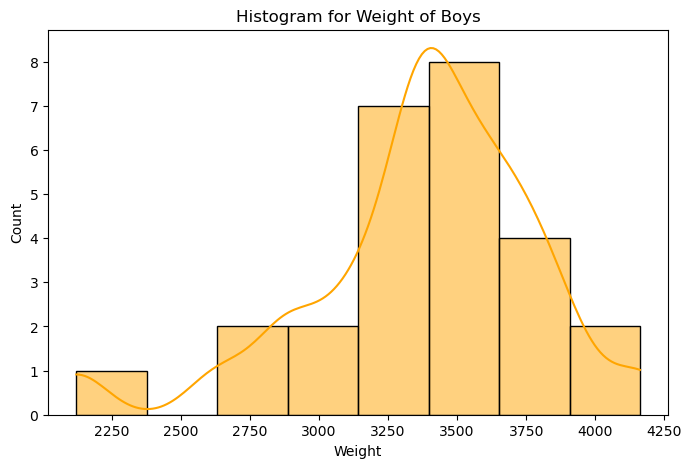

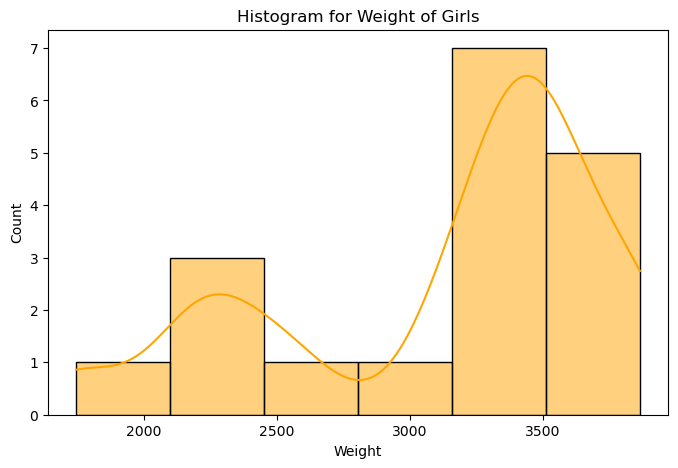

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(boys_data['Weight'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
# kde=True adds a density line
# bw_adjust adjusts the level of smoothing for the KDE
plt.title(f'Histogram for Weight of Boys')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(girl_data['Weight'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
# kde=True adds a density line
# bw_adjust adjusts the level of smoothing for the KDE
plt.title(f'Histogram for Weight of Girls')
plt.show()

In [7]:
# Shapiro-Wilk test for boys' weight
stat, p = stats.shapiro(boys_data['Weight'])
print('Shapiro-Wilk test for boys:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("The data is not normally distributed.")
if p > 0.05:
    print("The data is normally distributed.")

# Shapiro-Wilk test for girls' weight
stat, p = stats.shapiro(girl_data['Weight'])
print('Shapiro-Wilk test for girls:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("The data is not normally distributed.")
if p > 0.05:
    print("The data is normally distributed.")

Shapiro-Wilk test for boys:
Statistic: 0.9474738942208476 p-value: 0.20224825440795427
The data is normally distributed.
Shapiro-Wilk test for girls:
Statistic: 0.8702829450561838 p-value: 0.017984789994719325
The data is not normally distributed.


**Т.к вес девочек имеет не нормальное распределение будем использовать непараметрические методы.**

In [8]:
# Conducting the Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(girl_data['Weight'], boys_data['Weight'])

print(f"H-statistic: {h_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the distributions are different.")
else:
    print("Failed to reject the null hypothesis: the distributions are not different.")

H-statistic: 0.889093995408741
P-value: 0.3457229446672261
Failed to reject the null hypothesis: the distributions are not different.


In [9]:
# Conducting Levene's test for equality of variances
levene_statistic, levene_p_value = stats.levene(girl_data['Weight'], boys_data['Weight'])

print(f"Levene's Statistic: {levene_statistic}")
print(f"Levene's p-value: {levene_p_value}")

alpha = 0.05
if levene_p_value < alpha:
    print("Reject the null hypothesis: the variances are different.")
else:
    print("Failed to reject the null hypothesis: the variances are not different.")

Levene's Statistic: 1.8154103472308154
Levene's p-value: 0.18508483634639278
Failed to reject the null hypothesis: the variances are not different.



**Формула теста Левене**
$$F = \frac{\frac{\sum_{i=1}^{k} n_i (\tilde{d}i - \tilde{d})^2}{k - 1}}{\frac{\sum{i=1}^{k} \sum_{j=1}^{n_i} (d_{ij} - \tilde{d}_i)^2}{N - k}}
